In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR_encoded.csv")

In [3]:
X = df.drop('left', axis=1)
y = df['left']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [5]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
model = RandomForestClassifier(min_samples_split=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9941
Test Accuracy: 0.987

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [9]:
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validation accuracy:", round(scores.mean(), 4))


Cross-validation accuracy: 0.9795


In [10]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters from GridSearchCV:", grid.best_params_)

Best Parameters from GridSearchCV: {'max_depth': None, 'n_estimators': 100}


In [11]:
joblib.dump(model, "hr_model.pkl")

['hr_model.pkl']

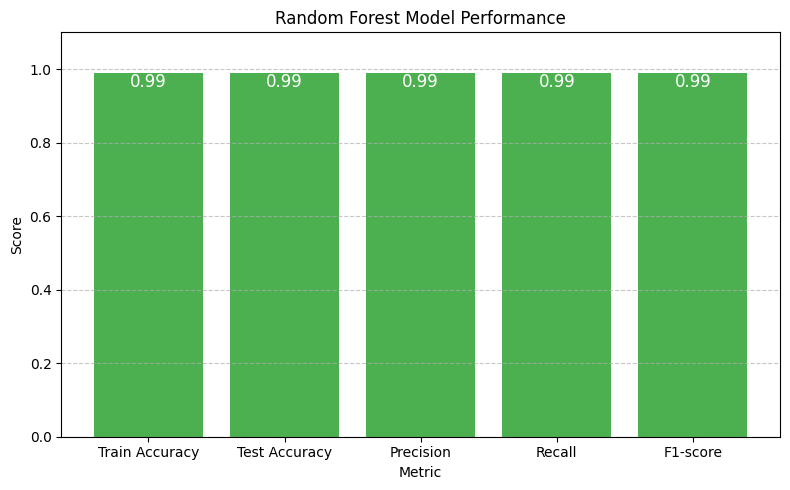

In [12]:
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.99, 0.99, 0.99, 0.99, 0.99]  # Replace with actual metrics if needed

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color='#4CAF50')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height - 0.05, f'{height:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.ylim(0, 1.1)
plt.title("Random Forest Model Performance")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_performance_bar.png", dpi=300)
plt.show()